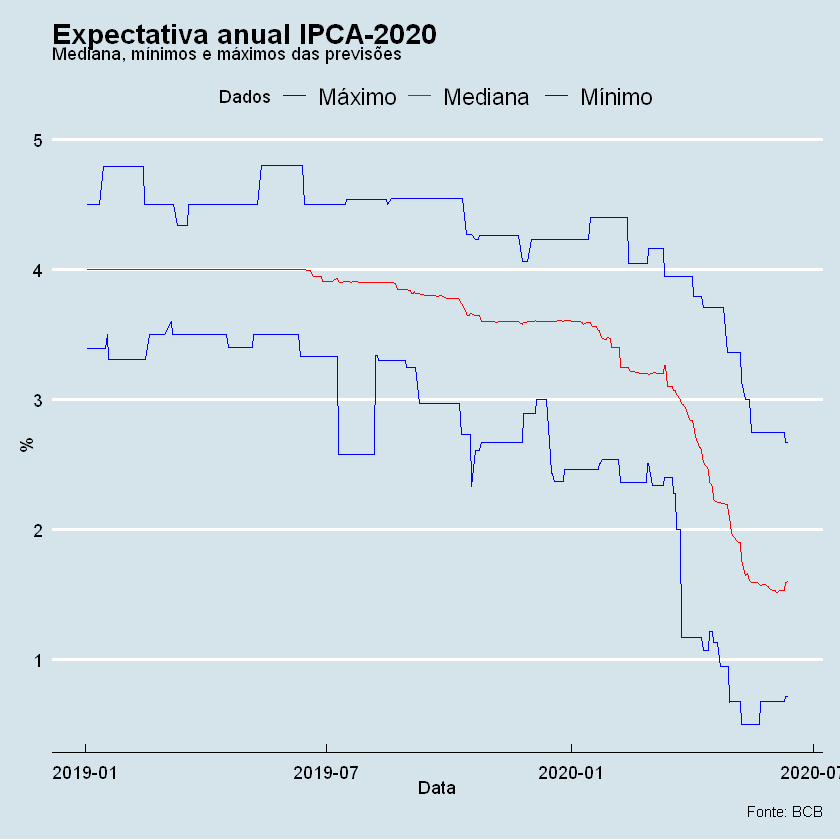

In [2]:
library(rbcb)
library(ggplot2)
library(ggthemes)
expectativas_2020 <- get_annual_market_expectations("IPCA", start_date = "2019-01-01")
expectativas_2020 <- expectativas_2020[which(expectativas_2020$reference_year==2020 &
                                               expectativas_2020$base == 0),]
ggplot(expectativas_2020, aes(x = date))+
  geom_line(aes(y = median, colour = "Mediana"))+
  labs(x = "Data", y = "%",
       title = "Expectativa anual IPCA-2020", caption = "Fonte: BCB",
       subtitle = "Mediana, mínimos e máximos das previsões")+
  geom_line(aes(y = min, colour = "Mínimo"))+
  geom_line(aes(y = max, colour = "Máximo"))+
  scale_colour_manual("Dados", values = c("Mínimo" = "blue", "Máximo" = "blue",
                                          "Mediana" = "red"))+
  theme_economist()

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

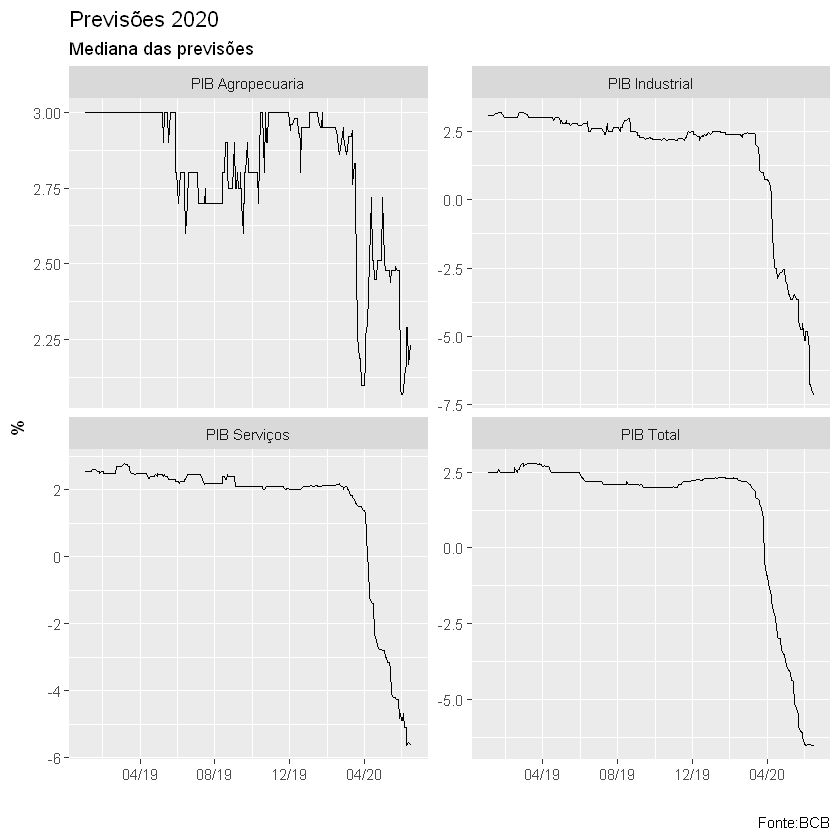

In [2]:
library(rbcb)
library(zoo)
library(ggplot2)
previsoes <- get_annual_market_expectations(indic = c("PIB Total", "PIB Serviços",
                                                      "PIB Agropecuária", "PIB Industrial"),
                                            start_date = "2019-01-01")
previsoes <- previsoes[which(previsoes$reference_year == 2020 & previsoes$base == 0),]
previsoes$indic <- gsub("PIB AgropecuÃ¡ria", "PIB Agropecuaria", previsoes$indic)
previsoes$indic <- gsub("PIB ServiÃ§os", "PIB Serviços", previsoes$indic)
ggplot(previsoes, aes(x = date, y = median))+
  geom_line()+
  facet_wrap(~indic,scales = "free_y", nrow = 2, ncol = 2)+
  labs(x = "", y = "%", title = "Previsões 2020",
       caption = "Fonte:BCB", subtitle = "Mediana das previsões")+
  scale_x_date(date_breaks = "4 month", date_labels = "%m/%y")